# Case Study: A Fund Raising Net Return Prediction Model

# 1. - Problem (case study)

#Data Description.
#Goal.

Situation: “Healthcare for All”, is a not-for-profit organization that provides financial help to people who are not 
able to afford healthcare. “Healthcare for All” raises funds through donations from all across the country. 
They have an in-house database of over 13 million donors.They reach out to the donors through various channels 
including personal mails, emails, fundraising events, reaching out to other businesses and corporations, and other 
philanthropists. One of their most efficient channels for a long period of time has been direct mails.
But for the last couple of years, they have seen a decline in the donations through this medium.

Task: To improve the cost-effectiveness of future direct marketing efforts, “Healthcare for All” wishes to develop 
a model that will help them maximize the net revenue (a regression or estimation task) generated from future renewal 
mailings to Lapsed donors.

Actions: 
    
Results:
    

Reflections:


# 2. - Getting Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("marketing_customer_analysis.csv")
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
df.describe(include=[object]).T

,count,unique,top,freq
Customer,9134,9134,BU79786,1
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
Effective To Date,9134,59,1/10/11,195
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location Code,9134,3,Suburban,5779
Marital Status,9134,3,Married,5298


In [7]:
# Reading data into a DataFrame
file1 = pd.read_csv('file1.csv')
display(file1.head(10))
display(file1.tail())
file1.shape

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,DOMAIN,TARGET_D
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0
5,100640,IL,M,764.00,457,501.0,1,16022,2,75,477.0,480,25.571429,1,6104,S2,30.0
6,18581,NC,female,775.00,318,419.0,5,13491,0,73,364.0,380,4.625000,0,4407,R2,12.0
7,119038,TX,M,890.00,519,560.0,0,17872,2,46,525.0,551,6.175000,1002,0,C1,7.0
8,173223,CA,F,NaN,184,250.0,0,8708,2,63,206.0,235,8.818182,0,1801,T2,10.0
9,157988,CA,F,AAA2294,593,617.0,61,17838,7,62,NaN,619,6.666667,28,0,S1,10.0


,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,DOMAIN,TARGET_D
1002,114721,OK,NaN,1040,472,656.0,0,26962,2,56,609.0,579,11.666667,0,0,C2,15.0
1003,149152,CA,M,4507,842,962.0,95,54642,17,50,1004.0,893,20.000000,1,4401,S1,20.0
1004,959,IA,F,586,349,465.0,1,15304,1,77,413.0,404,7.300000,0,4404,C2,10.0
1005,179563,WA,male,842,420,494.0,2,12894,41,24,419.0,476,16.400000,1,5001,S2,23.0
1006,41243,FL,F,556,246,330.0,0,10272,2,56,277.0,292,9.818182,2,2201,S2,12.0


(1007, 17)

In [8]:
data = pd.concat([file1, df], axis=1) 
data.shape
data

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,44060.0,FL,M,AAA896,392.0,520.0,7.0,21975,6.0,16.0,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,96093.0,IL,M,537.00,365.0,473.0,0.0,19387,1.0,89.0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,43333.0,FL,F,725.00,301.0,436.0,3.0,18837,11.0,17.0,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,21885.0,NC,M,AAA1095,401.0,413.0,7.0,14014,1.0,74.0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,190108.0,FL,F,995.00,252.0,348.0,0.0,17991,5.0,6.0,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [9]:
data.describe(include='all')

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,1007.000000,1007,967,1005,1007.000000,1006.000000,1007.000000,1007,1007.000000,1007.000000,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,NaN,43,9,757,NaN,NaN,NaN,954,NaN,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,NaN,CA,F,0,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,NaN,106,478,7,NaN,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,98913.029791,NaN,NaN,NaN,352.015889,445.059642,16.261172,NaN,6.847071,55.630586,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,58306.879885,NaN,NaN,NaN,173.937638,178.115476,29.464477,NaN,9.333689,21.593999,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,71.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,44930.500000,NaN,NaN,NaN,238.500000,325.000000,0.000000,NaN,1.000000,41.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,101113.000000,NaN,NaN,NaN,319.000000,406.000000,1.000000,NaN,4.000000,57.000000,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,151559.000000,NaN,NaN,NaN,421.500000,527.000000,14.000000,NaN,9.000000,74.000000,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


In [10]:
data.describe(include=[np.number])


,CONTROLN,IC1,IC4,HVP1,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,TARGET_D,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,1007.000000,1007.000000,1006.000000,1007.000000,1007.000000,1007.000000,1006.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,98913.029791,352.015889,445.059642,16.261172,6.847071,55.630586,401.658052,400.022840,11.863404,37.747766,2555.362463,16.026604,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,58306.879885,173.937638,178.115476,29.464477,9.333689,21.593999,182.024618,168.901139,7.829965,213.010617,2069.953954,14.586646,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.361111,0.000000,0.000000,1.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,44930.500000,238.500000,325.000000,0.000000,1.000000,41.000000,283.000000,286.000000,7.285714,0.000000,0.000000,10.000000,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,101113.000000,319.000000,406.000000,1.000000,4.000000,57.000000,364.500000,361.000000,10.000000,1.000000,2501.000000,13.920000,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,151559.000000,421.500000,527.000000,14.000000,9.000000,74.000000,474.750000,478.000000,14.500000,2.000000,4308.500000,20.000000,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,191779.000000,1500.000000,1263.000000,99.000000,73.000000,96.000000,1500.000000,1185.000000,89.444444,4002.000000,8305.000000,200.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# 3 - Cleaning/Wrangling/EDA

In [11]:
# cols = []
# for i in range(len(df.columns)):
#     cols.append(df.columns[i].lower())
# df.columns = cols

# alternative for using range(len(list)) in the for loop:
cols = []
for column in data.columns:
    cols.append(column.lower())
cols
data.columns = cols
data

,controln,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,44060.0,FL,M,AAA896,392.0,520.0,7.0,21975,6.0,16.0,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,96093.0,IL,M,537.00,365.0,473.0,0.0,19387,1.0,89.0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,43333.0,FL,F,725.00,301.0,436.0,3.0,18837,11.0,17.0,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,21885.0,NC,M,AAA1095,401.0,413.0,7.0,14014,1.0,74.0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,190108.0,FL,F,995.00,252.0,348.0,0.0,17991,5.0,6.0,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [12]:
data.isna().sum()

controln                         8127
state                            8127
gender                           8167
hv1                              8129
ic1                              8127
ic4                              8128
hvp1                             8127
ic5                              8127
pobc1                            8127
pobc2                            8127
ic2                              8128
ic3                              8127
avggift                          8127
tcode                            8127
dob                              8127
domain                           8127
target_d                         8127
customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income      

In [25]:
data.fillna(0)

,controln,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,44060.0,FL,M,AAA896,392.0,520.0,7.0,21975,6.0,16.0,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,96093.0,IL,M,537.00,365.0,473.0,0.0,19387,1.0,89.0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,43333.0,FL,F,725.00,301.0,436.0,3.0,18837,11.0,17.0,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,21885.0,NC,M,AAA1095,401.0,413.0,7.0,14014,1.0,74.0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,190108.0,FL,F,995.00,252.0,348.0,0.0,17991,5.0,6.0,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,41384.0,FL,F,556,318.0,352.0,0.0,11779,16.0,22.0,...,71,0,3,Personal Auto,Personal L2,Offer3,Branch,54.065538,Four-Door Car,Medsize
1003,149152.0,CA,M,4507,842.0,962.0,95.0,54642,17.0,50.0,...,47,0,6,Personal Auto,Personal L3,Offer3,Web,342.515136,Four-Door Car,Medsize
1004,959.0,IA,F,586,349.0,465.0,1.0,15304,1.0,77.0,...,19,0,2,Personal Auto,Personal L2,Offer2,Agent,441.600000,Four-Door Car,Small
1005,179563.0,WA,male,842,420.0,494.0,2.0,12894,41.0,24.0,...,28,0,3,Personal Auto,Personal L3,Offer1,Branch,1027.177255,Two-Door Car,Small


In [18]:
data['gender'].describe

<bound method NDFrame.describe of      gender gender
0         M      F
1         M      F
2         F      F
3         M      M
4         F      M
...     ...    ...
1001      F      F
1003      M      M
1004      F      M
1005   male      M
1006      F      M

[963 rows x 2 columns]>

In [30]:
cat_cols=[col for col in data.columns if (data[col].dtype==object)]     # categorical columns
data.select_dtypes(exclude=["number","bool_","object_"])


AttributeError: 'DataFrame' object has no attribute 'dtype'

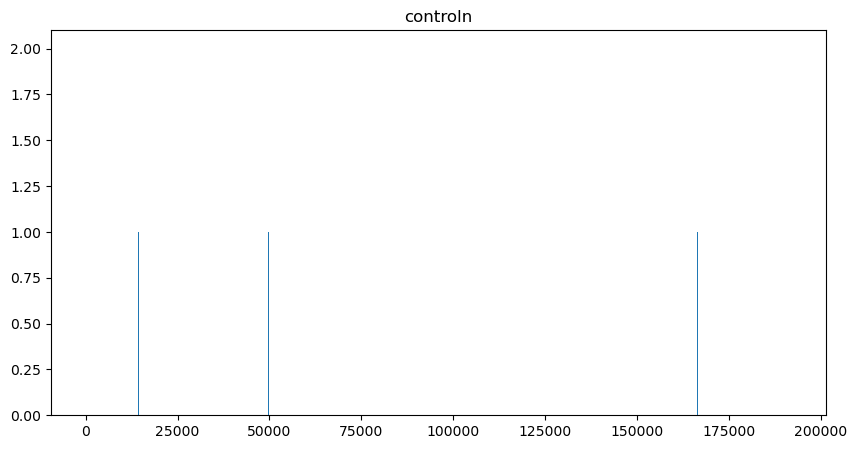

AttributeError: 'DataFrame' object has no attribute 'unique'

<Figure size 1000x500 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt                 # visualization library
%matplotlib inline

for c in cols:
    plt.figure(figsize=(10,5))
    plt.bar(data[c].unique(), data[c].value_counts())
    plt.title(c)
    plt.show();